In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [2]:
responces = pd.read_csv(filepath_or_buffer="responses.csv")
colms = pd.read_csv(filepath_or_buffer="columns.csv")

In [10]:
responces.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


In [50]:
print("column len :",len(responces.columns))
data_cols = [responces.columns]
data_cols

column len : 150


[Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
        'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
        ...
        'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
        'Left - right handed', 'Education', 'Only child', 'Village - town',
        'House - block of flats'],
       dtype='object', length=150)]

In [9]:
colms.head()

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country


In [41]:
responces = responces.dropna()

### The variables can be split into the following groups:
Music preferences (19 items) <br>
Movie preferences (12 items)<br>
Hobbies & interests (32 items)<br>
Phobias (10 items)<br>
Health habits (3 items)<br>
Personality traits, views on life, & opinions (57 items)<br>
Spending habits (7 items)<br>
Demographics (10 items)<br>

In [43]:
music  = responces.iloc[:,0:19] 
movies = responces.iloc[:,20:31] 
phobias = responces.iloc[:,64:73] 
interests = responces.iloc[:,32:63] 
health = responces.iloc[:,74:76] 
personal = responces.iloc[:, 77:133] 
demo = responces.iloc[:,141:150] 
spending = responces.iloc[:,134:140]

In [46]:
movies.head(2)

,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0
1,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0


In [47]:
phobias.head(2)

,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0
1,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0


## Data Preparation

In [48]:
responces.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,...,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,4.762611,3.295252,3.078635,2.264095,2.117211,2.982196,2.759644,3.451039,3.787834,2.354599,...,3.258160,3.026706,3.191395,3.096439,2.850148,3.514837,20.353116,173.419881,66.117211,1.299703
std,0.594699,0.795833,1.179841,1.120517,1.063888,1.244176,1.281403,1.165938,1.152979,1.396371,...,1.305537,1.305787,1.180771,1.208398,1.299140,1.076806,2.732763,9.475720,13.900289,0.992887
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,152.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,20.000000,172.000000,63.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,21.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,203.000000,150.000000,10.000000


In [60]:
#Spliting the Male data and Female data
male = responces[responces.Gender == "male"]
female = responces[responces.Gender == "female"]

### Research Question1:
## Are there any gender differences in loneliness?

In [73]:
#We can Check who feel More Lonely:Having Child or Not Having child
with_one_child = responces[responces['Only child'] == "yes"]
with_more_child = responces[responces['Only child'] == "no"]

Text(0.5,1,'With More Children')

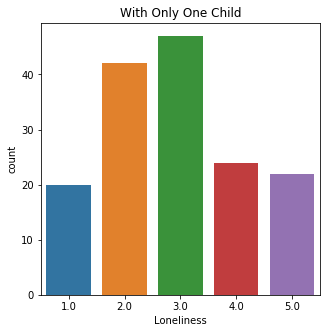

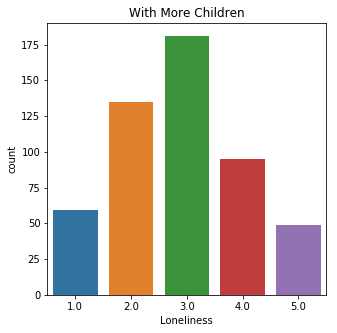

In [78]:
#1-5 is the Votes
lable_to_check = "Loneliness"
figure, axis = plt.subplots(figsize=(5,5))
sns.countplot(x=with_one_child['Loneliness'],orient='h').set_title("With Only One Child")

figure, axis = plt.subplots(figsize=(5,5))
sns.countplot(x=with_more_child['Loneliness'],orient='h').set_title("With More Children")

## Solve for Loneliness using Machine Learning

In [139]:
#All these are Feactures
movie_pref = responces.iloc[:,[0,19]]
phobias = responces.iloc[:,63:73]
intrests = responces.iloc[:,31:63]
spending_habits = responces.iloc[:,133:140] #This includes Hobbies and Stuffs
demotographies = responces.iloc[:,140:150]

In [140]:
#Prediction Class\
predict = responces.iloc[:,99] #Level 1-5

In [141]:
#Dataframe to Join all these Variables
data_feed = movie_pref.join([phobias,intrests,spending_habits,demotographies,predict])

In [142]:
data_feed.head(2)

,Music,Movies,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Loneliness
0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,...,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats,3.0
1,4.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,...,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats,2.0


In [143]:
#Getting Dummy data for the Categorical Data
gender = pd.get_dummies(responces['Gender'])
handed = pd.get_dummies(responces['Left - right handed'])
num_child = pd.get_dummies(responces["Only child"])
village_town = pd.get_dummies(responces['Village - town'])
housing = pd.get_dummies(responces['House - block of flats'])
education = pd.get_dummies(responces['Education'])

## But In Data Feed web have Numerical Data, so We need to Drop Them


In [144]:
data_feed[['Gender']].head(2)

,Gender
0,female
1,female


## Replacing with our Pre-Proprocessed Data with Pandas


In [145]:
data_feed.drop(labels=["Gender","Left - right handed","Only child","Village - town","House - block of flats","Education"],axis=1,inplace=True)

In [146]:
#Replacing the Data(Dummy Variables)
data_feed = data_feed.join([gender,handed,num_child,village_town,housing,education])

In [147]:
data_feed = data_feed.dropna()

## Insterd of Doing a Multi-Class Classification for our Lables we Can Turn them into Binary Class Classification problem

In [148]:
data_feed.loc[data_feed['Loneliness']<=3, 'Loneliness'] = 0
data_feed.loc[data_feed['Loneliness']>3, 'Loneliness'] = 1

In [149]:
data_feed['Loneliness'].head(3)

0    0.0
1    0.0
2    1.0
Name: Loneliness, dtype: float64

In [158]:
#Setting up X and Y's for our Data set
X = data_feed.drop('Loneliness', axis=1)
y = data_feed['Loneliness']

from sklearn.cross_validation import train_test_split
#Setting up Test and Validation sets for our Data using sklean
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.10,random_state=115)

## Searching for the Best value for the Parameter of the Log-Reg Model.

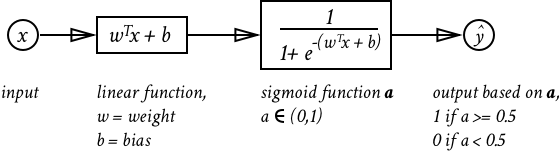

In [171]:
Image(filename="neuron.png",height=200,width=500)

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [160]:
#This can be done by Backend Parameter Computing usig SearchCV
logistic_regression_model_cv = LogisticRegression()
#C is the Inverse of the Regularization Strength
param_grid = {'C':[0.3,0.9,1.9,3.10,0.01]}
grid_search = GridSearchCV(logistic_regression_model,param_grid=param_grid)
grid_search.fit(x_train, y_train)
print(f'The Best Value of C is {grid_search.best_params_} for the Logistic Model')

The Best Value of C is {'C': 0.01} for the Logistic Model


In [161]:
logistic_regression_model = LogisticRegression(C=0.01)
logistic_regression_model.fit(X_train,y_train)
print("Accuracy for the Logistic Mdoel is {:4f}".format(logistic_regression_model.score(X_test,y_test)))

Accuracy for the Logistic Mdoel is 0.720588
